## Final Project Submission

Please fill out:
* Student name: Charity Kanyua
* Student pace: Full time Hybrid DSFT-14
* Scheduled project review date/time: 
* Instructor name: Diana Mongina
* Blog post URL:


Loading the data

In [17]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#Loading the dataset
df = pd.read_csv("./data/Aviation_Data.csv")
df.head()

c:\Users\This pc\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [20]:
df.shape

(90348, 31)

Data cleaning

In [21]:
#checking for duplicates
df.duplicated().value_counts()

False    88958
True      1390
dtype: int64

In [22]:
#dropping duplicates
df = df.drop_duplicates()
df.duplicated().value_counts()

False    88958
dtype: int64

In [23]:
#checking columns with null values
df.isnull().sum()


Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [25]:
#columns to be used for analysis
df = df[["Event.Id", "Event.Date", "Location", "Country", "Injury.Severity", "Aircraft.damage", "Aircraft.Category","Make", "Model" , "Number.of.Engines", "Engine.Type", "Purpose.of.flight", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Weather.Condition"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [26]:
df.shape

(88958, 17)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [37]:
#converting Event.Date to datetime format
df["Event.Date"] = pd.to_datetime(df["Event.Date"])

In [38]:
#categorical columns
categorical_cols = ["Location", "Country", "Injury.Severity", "Aircraft.damage", "Aircraft.Category","Make", "Model" ,  "Engine.Type", "Purpose.of.flight", "Weather.Condition"]


In [39]:
#Filling missing values in categorical columns with Unkown
df[categorical_cols] = df[categorical_cols].fillna("Unknown")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Location                88958 non-null  object        
 3   Country                 88958 non-null  object        
 4   Injury.Severity         88958 non-null  object        
 5   Aircraft.damage         88958 non-null  object        
 6   Aircraft.Category       88958 non-null  object        
 7   Make                    88958 non-null  object        
 8   Model                   88958 non-null  object        
 9   Number.of.Engines       88958 non-null  float64       
 10  Engine.Type             88958 non-null  object        
 11  Purpose.of.flight       88958 non-null  object        
 12  Total.Fatal.Injuries    77488 non-null  float6

In [36]:
#filling missing values in Number.of.Engines with the mode
df["Number.of.Engines"] = df["Number.of.Engines"].fillna(df["Number.of.Engines"].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88958 non-null  object 
 3   Country                 88958 non-null  object 
 4   Injury.Severity         88958 non-null  object 
 5   Aircraft.damage         88958 non-null  object 
 6   Aircraft.Category       88958 non-null  object 
 7   Make                    88958 non-null  object 
 8   Model                   88958 non-null  object 
 9   Number.of.Engines       88958 non-null  float64
 10  Engine.Type             88958 non-null  object 
 11  Purpose.of.flight       88958 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [40]:
#Filling null values in injury columns with 0
injury_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
df[injury_cols] = df[injury_cols].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Location                88958 non-null  object        
 3   Country                 88958 non-null  object        
 4   Injury.Severity         88958 non-null  object        
 5   Aircraft.damage         88958 non-null  object        
 6   Aircraft.Category       88958 non-null  object        
 7   Make                    88958 non-null  object        
 8   Model                   88958 non-null  object        
 9   Number.of.Engines       88958 non-null  float64       
 10  Engine.Type             88958 non-null  object        
 11  Purpose.of.flight       88958 non-null  object        
 12  Total.Fatal.Injuries    88958 non-null  float6

In [41]:
#converting numeric columns to integer
numeric_cols = ["Number.of.Engines", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
df[numeric_cols] = df[numeric_cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Location                88958 non-null  object        
 3   Country                 88958 non-null  object        
 4   Injury.Severity         88958 non-null  object        
 5   Aircraft.damage         88958 non-null  object        
 6   Aircraft.Category       88958 non-null  object        
 7   Make                    88958 non-null  object        
 8   Model                   88958 non-null  object        
 9   Number.of.Engines       88958 non-null  int32         
 10  Engine.Type             88958 non-null  object        
 11  Purpose.of.flight       88958 non-null  object        
 12  Total.Fatal.Injuries    88958 non-null  int32 

Data Analysis

In [60]:
df["Make"]= df["Make"].str.lower()

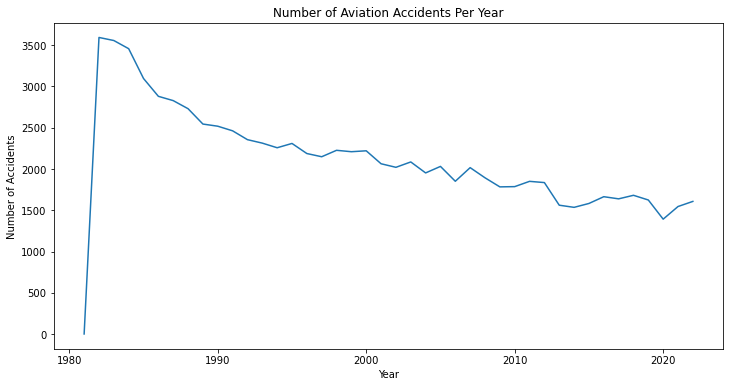

In [61]:
#Number of accidents per year
df['Year'] = df['Event.Date'].dt.year
accidents_per_year = df['Year'].value_counts().sort_index()

start_year = 1980
accidents_per_year = accidents_per_year[accidents_per_year.index >= start_year]

plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Aviation Accidents Per Year')
plt.show()

In [62]:
#getting the total number of injuries and fatalities
col_totals = df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries"]].sum()
col_totals

Total.Fatal.Injuries      50201
Total.Serious.Injuries    21377
Total.Minor.Injuries      27478
dtype: int64

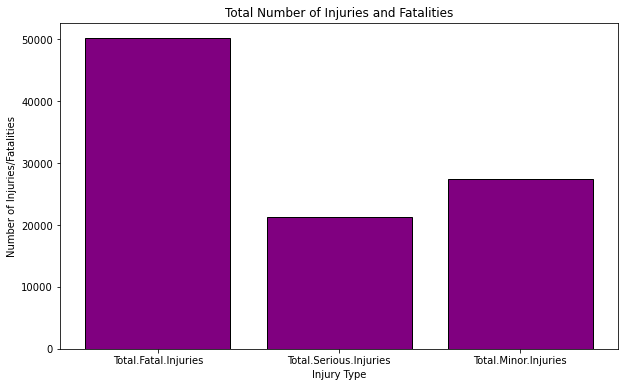

In [63]:
#visualizing the total number of injuries and fatalities
plt.figure(figsize=(10,6))
plt.bar(col_totals.index, col_totals.values, color="purple", edgecolor="black")
plt.xlabel("Injury Type")
plt.ylabel("Number of Injuries/Fatalities")
plt.title("Total Number of Injuries and Fatalities")
plt.show()

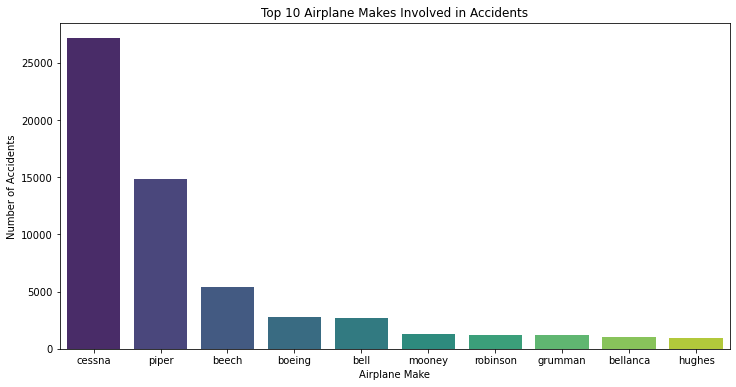

In [64]:
#number of accidents by airplane make
accidents_by_make = df["Make"].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=accidents_by_make.index, y=accidents_by_make.values, palette="viridis")
plt.xlabel("Airplane Make")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Airplane Makes Involved in Accidents")
plt.show()

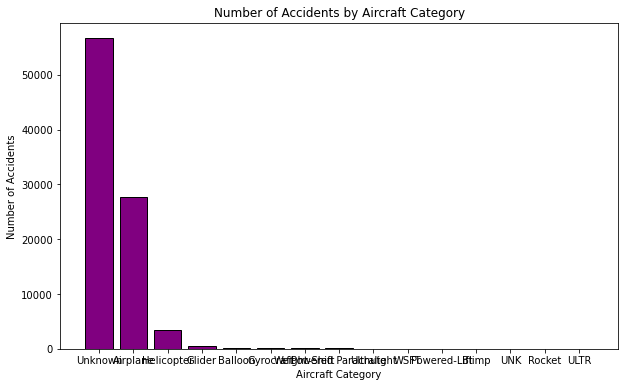

In [65]:
#number of accidents by aircraft category
plt.figure(figsize=(10,6))
plt.bar(df["Aircraft.Category"].value_counts().index, df["Aircraft.Category"].value_counts().values, color="purple", edgecolor="black")
plt.xlabel("Aircraft Category")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Aircraft Category")
plt.show()

In [32]:
#exporting cleaned data as a csv file
df.to_csv("./data/cleaned_aviation_data.csv", index=False)